In [1]:
# to mount gdrive to colab, use this https://stackoverflow.com/a/61113429
# naman ko problem nahi hogi but for the rest
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
#! ls /content/drive/MyDrive/Bhasad\ OP!!!/binvox

In [3]:
! pwd

/home/sid/networks


In [4]:
#! cp /content/drive/MyDrive/Bhasad\ OP!!!/binvox/binvox_rw.py /content/
#! cp /content/drive/MyDrive/Bhasad\ OP!!!/binvox/model.binvox /content/
! ls

 55	        binvox_rw.pyc   occ_data.py
 56	        content         occ_server.py
 57	        convert.py     'Occupancy_Network (1) (1) (1).ipynb'
 58	        Debug	       'Occupancy_Network (1).ipynb'
 59	        Debug1	        Occupancy_Network_Debug2.ipynb
 60	        Debug1.zip      Occupancy_Network.ipynb
 61	        Debug2	        OUTPUT
 62	        debug2_model    output_77_epochs_Debug2
 63	        Debug2.zip      output_85
 64	        Debug.zip       OUTPUT.zip
 65	        final_model     Preprocessing-naman.ipynb
 66	        model.binvox    __pycache__
 67	        model.npy       training_17
 binvox_rw.py   occ_data_2.py   training85


In [5]:
import binvox_rw
import numpy as np
import sys
import time

model = None
t1 = time.time()
with open("model.binvox", 'rb') as f:
    
    model = binvox_rw.read_as_3d_array(f)
print(time.time()-t1)
print((model.data).shape)
np.save("model.npy", model.data)

model.data[1,2,3]


0.0041348934173583984
(32, 32, 32)


False

In [7]:
model = None
t2 = time.time()
model = np.load("model.npy", allow_pickle=True)
print(time.time()-t2)

0.0016601085662841797


In [ ]:
#! cd /content/drive/MyDrive/Bhasad\ OP!!!/ && unzip Debug.zip

Streaming output truncated to the last 5000 lines.
  inflating: Debug/821/images/010.jpg  
  inflating: Debug/821/images/011.jpg  
  inflating: Debug/821/images/012.jpg  
  inflating: Debug/821/images/013.jpg  
  inflating: Debug/821/images/014.jpg  
  inflating: Debug/821/images/015.jpg  
  inflating: Debug/821/images/016.jpg  
  inflating: Debug/821/images/017.jpg  
  inflating: Debug/821/images/018.jpg  
  inflating: Debug/821/images/019.jpg  
  inflating: Debug/821/images/020.jpg  
  inflating: Debug/821/images/021.jpg  
  inflating: Debug/821/images/022.jpg  
  inflating: Debug/821/images/023.jpg  
  inflating: Debug/821/images/cameras.npz  
  inflating: Debug/821/model.binvox  
   creating: Debug/822/
   creating: Debug/822/images/
  inflating: Debug/822/images/000.jpg  
  inflating: Debug/822/images/001.jpg  
  inflating: Debug/822/images/002.jpg  
  inflating: Debug/822/images/003.jpg  
  inflating: Debug/822/images/004.jpg  
  inflating: Debug/822/images/005.jpg  
  inflating:

In [8]:
#! ls -l /content/drive/MyDrive/Bhasad\ OP!!!/Debug | wc

## Zero mean Images


In [9]:
#!cp /content/drive/MyDrive/Bhasad\ OP!!!/Debug.zip /content/

In [10]:
#!unzip Debug.zip

In [29]:
#!rm -rf ./OUTPUT/

In [7]:
import os

ROOT = './'
DIR = 'Debug1'
OUTPUT = './OUTPUT/' + DIR
#DRIVE = '/content/drive/MyDrive/Bhasad\ OP!!!'

IMAGE_EXT = '.jpg'

IMAGE_H = 137
IMAGE_W = 137

root_path = os.path.join(ROOT, DIR)
folders = os.listdir(root_path)

#os.makedirs(OUTPUT)

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# def process_image(path):
#   image = cv2.imread(path, cv2.IMREAD_COLOR)
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#   image = image / 255.

#   means = image.mean(axis=(0, 1), keepdims=True)#.astype(np.uint8)
#   std = image.std(axis=(0, 1), keepdims=True)#.astype(np.uint8)

#   return (image - means) / std

# img = process_image(root_path + '/0/images/000.jpg')
# #img
# print(np.min(img))
# #plt.imshow(img)

In [9]:
index = 0
total = len(folders)
print(total)
images_sum = np.zeros((IMAGE_H, IMAGE_W, 3))
image_num = 0
for folder in folders:
  print('Processing {}; {} of {}'.format(folder, index, total), end="\r")
  path = os.path.join(ROOT, DIR, folder)

  if os.path.isdir(path):

    images_path = os.path.join(path, 'images')

    for im in os.listdir(images_path):
      image_path = os.path.join(images_path, im)
      extension = os.path.splitext(image_path)[-1]

      if extension == IMAGE_EXT:
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        images_sum += image
        image_num += 1

  index += 1

3200


19584000.0
76800
255.0
126.11830729166667


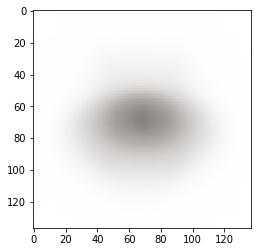

In [10]:
mean = images_sum / image_num
print(images_sum.max())
print(image_num)
print(mean.max())
print(mean.min())
plt.imshow(mean.astype(np.uint8))

In [14]:
np.save("mean_img.npy", mean)
print(mean.dtype)

float64


In [10]:
index = 0
total = len(folders)
for folder in folders:
  print('Processing {}; {} of {}'.format(folder, index, total), end="\r")
  path = os.path.join(ROOT, DIR, folder)

  if os.path.isdir(path):
    output_path = os.path.join(OUTPUT, folder)
    os.mkdir(output_path)

    images_path = os.path.join(path, 'images')

    output_path = os.path.join(output_path, 'images')
    os.mkdir(output_path)
    for im in os.listdir(images_path):
      image_path = os.path.join(images_path, im)
      filename = os.path.splitext(im)[0]
      extension = os.path.splitext(image_path)[-1]

      output = os.path.join(output_path, filename+'.npy')
      if extension == IMAGE_EXT:
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        image = image - mean
        image /= 128

        np.save(output, image)

  index += 1

In [ ]:
#!zip -r /content/OUTPUT.zip /content/OUTPUT/

In [62]:
#!cp /content/OUTPUT.zip /content/drive/MyDrive/Bhasad\ OP!!!/OUTPUT.zip

In [1]:
#arr = np.load(os.path.join(OUTPUT,'0/images/004.npy'))

NameError: ignored